In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

In [2]:
V = '0.5*m**2*phi**2'
param = {'m': 5.9e-6}

#Instancia de la clase potential
potential = PotentialFunction.from_string(V, param_values= param)

In [3]:
#Instancia de la clase background
bg = Background(potential, phi0 = 17.5)
sol = bg.solve()

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (bg.data[i] for i in vars)
Nend = bg.data['N'][-1]
data =bg.save_data()

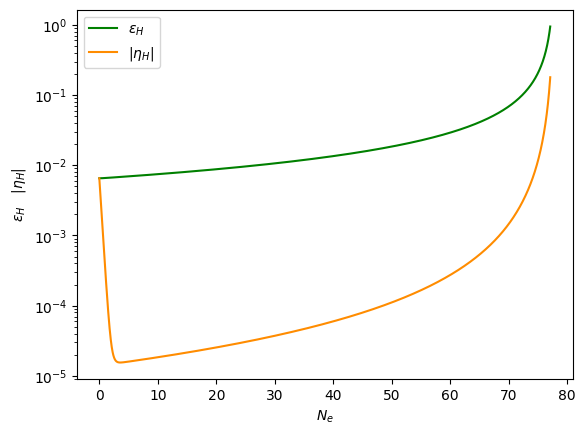

In [5]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')


plt.yscale('log')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')

In [6]:
pert = Perturbations(potential, bg, scale= 'CMB', N_CMB = 60)
sol = pert.Power_spectra_pivot()


Curvature power spectrum at pivot scale is 2.041150891113374e-09
Tensor to scalar ratio at pivot scale is 0.1321631158749578


In [7]:
PS = pert.Power_spectrum(save = True)

Computing P(k): 100%|██████████| 1000/1000 [01:11<00:00, 13.96it/s]


/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:607: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

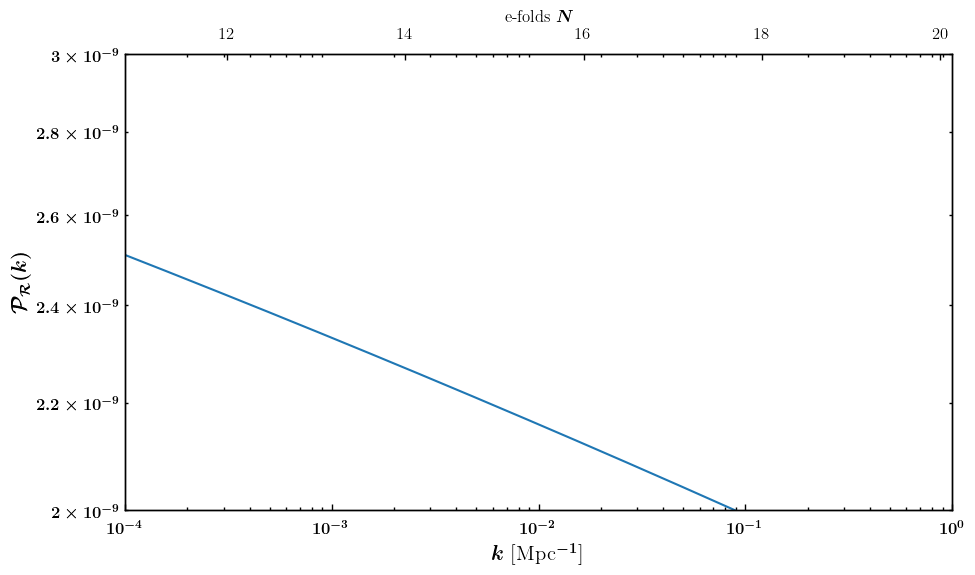

In [8]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)


In [9]:
print(pert.Spectral_tilts)


{'n_s': 0.9647196071665531, 'n_t': -0.01866087615392772}
